<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Mr. Maimoon Amin</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/Maimoon-github)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/maimoon7)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/maimoon-amin-6a2aa4275/)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](ideal.rhel@gmail.com)

# **TASK** # **4**

# **The overview of Sales Prediction using Python**

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to
predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

DOWNLOAD DATASET FROM [here](https://www.kaggle.com/datasets/bumba5341/advertisingcsv)

To start a sales prediction task with this dataset, here’s a step-by-step guide:

### 1. **Import Necessary Libraries**
   Begin by importing essential libraries such as pandas, numpy, matplotlib, and seaborn for data analysis and visualization, along with scikit-learn for machine learning.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. **Load and Inspect the Data**
   Load the dataset and inspect it to understand its structure and identify any missing values or potential data issues.

In [9]:
# Load dataset
data = pd.read_csv('advertising.csv')

In [11]:
# Display first few rows
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
# Check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


This table shows descriptive statistics for an advertising dataset, which includes columns for **TV**, **Radio**, **Newspaper** spending, and **Sales**. Each row provides summary statistics based on 200 observations.

1. **count**: Shows there are 200 data points for each variable.
2. **mean**: The average spending on TV ads is approximately 147.04, on Radio is 23.26, and on Newspaper is 30.55. The average sales figure is 14.02.
3. **std (standard deviation)**: Indicates variability in each category. For instance, TV has the highest standard deviation (85.85), suggesting higher spending variability, while Radio is more consistent with a lower deviation (14.85).
4. **min (minimum)**: The lowest values for TV, Radio, and Newspaper spending are 0.7, 0, and 0.3, respectively. The minimum sales value recorded is 1.6.
5. **25% (first quartile)**: For TV spending, the first quartile (25th percentile) is 74.38, meaning 25% of data falls below this value. Similar interpretations apply for the other columns.
6. **50% (median)**: The median (50th percentile) is 149.75 for TV, 22.9 for Radio, 25.75 for Newspaper, and 12.9 for Sales.
7. **75% (third quartile)**: The third quartile is 218.83 for TV, 36.53 for Radio, 45.1 for Newspaper, and 17.4 for Sales, meaning 75% of data falls below these values.
8. **max (maximum)**: The highest recorded values are 296.4 for TV, 49.6 for Radio, 114 for Newspaper, and 27 for Sales.

These statistics help in understanding the distribution and variability of the dataset's features.

In [13]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Since the dataset has an 'Unnamed: 0' column (likely an index), consider dropping it if it doesn’t add valuable information.

In [14]:
data = data.drop(['Unnamed: 0'], axis=1)

In [15]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### 3. **Exploratory Data Analysis (EDA)**
   Analyze the relationship between features ('TV,' 'Radio,' and 'Newspaper') and the target ('Sales'):

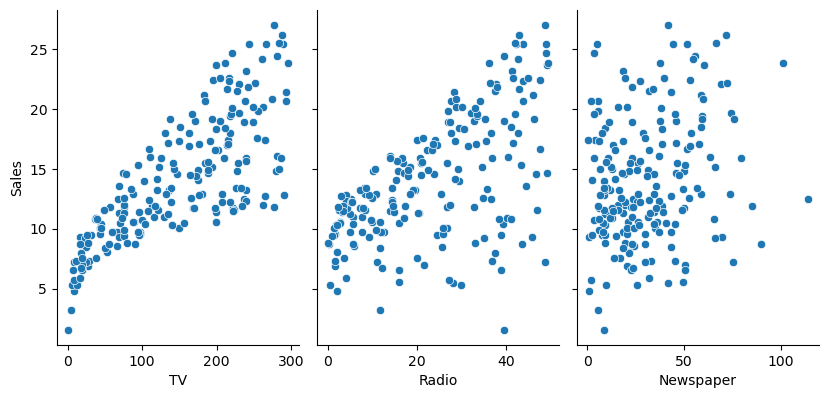

In [16]:
# Visualize relationships
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.7, kind='scatter')
plt.show()

This is a heatmap showing the correlation matrix for four variables: **TV**, **Radio**, **Newspaper**, and **Sales**. Each cell in the heatmap displays the correlation coefficient between pairs of variables, with values ranging from -1 to 1. The color intensity represents the strength and direction of the correlation: darker shades (towards black) indicate low correlation, while lighter shades (towards orange and red) indicate higher positive correlations.

Key observations:
- **TV and Sales** have a strong positive correlation (0.78), suggesting that higher spending on TV ads is associated with increased sales.
- **Radio and Sales** also show a moderate positive correlation (0.58), indicating a positive relationship, though weaker than TV and Sales.
- **Newspaper and Sales** have a weaker positive correlation (0.23), suggesting a limited impact of Newspaper spending on sales.
- **TV, Radio,** and **Newspaper** are only weakly correlated with each other (with values around 0.05 to 0.35), suggesting that spending in these media types is mostly independent.

The heatmap effectively visualizes the relationships between variables, with Sales showing the highest correlations with TV and Radio spending.

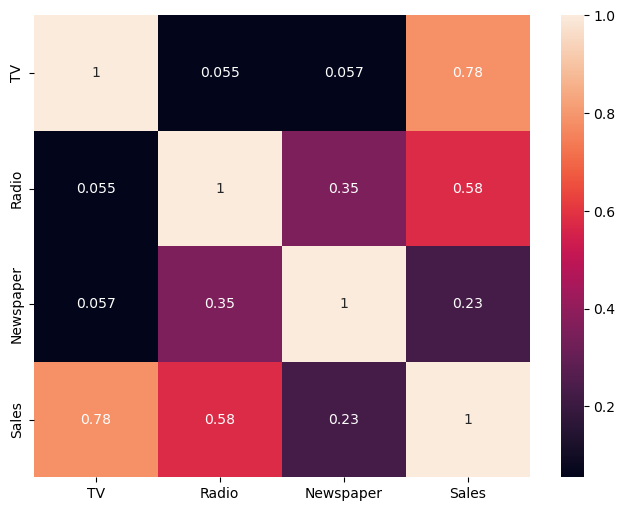

In [17]:
# Check correlation
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()

### 4. **Split Data into Training and Testing Sets**
   Divide the data into training and testing sets to evaluate the model’s performance.

In [18]:
X = data[['TV', 'Radio', 'Newspaper']]  # Features

In [19]:
y = data['Sales']                       # Target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. **Build and Train the Model**
   Use Linear Regression to predict sales:

In [21]:
# Initialize and train the model
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

### 6. **Evaluate the Model**
   Predict on the test set and calculate the model’s accuracy using metrics like RMSE and R² score.

In [23]:
# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

The **Root Mean Squared Error (RMSE)** and **R-squared Score (R²)** are evaluation metrics for a regression model, providing insights into its performance.

1. **Root Mean Squared Error (RMSE)**: 1.7816
   - RMSE measures the average magnitude of errors between the predicted and actual values. Here, an RMSE of 1.7816 means that, on average, the predictions deviate from the actual values by about 1.78 units. A lower RMSE indicates better model accuracy, with zero being perfect prediction. However, the acceptable RMSE value depends on the range of the data.

2. **R-squared Score (R²)**: 0.8994
   - R² represents the proportion of variance in the target variable (Sales, in this case) explained by the model. An R² of 0.8994 means that approximately 89.94% of the variability in Sales is explained by the model’s inputs (e.g., spending on TV, Radio, and Newspaper). This high R² value suggests that the model captures the data patterns well, with only about 10.06% of the variance unexplained.

In summary, the model demonstrates good predictive performance, with high accuracy (indicated by a high R² score) and reasonably low error (given by RMSE).

In [27]:
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Root Mean Squared Error: 1.7815996615334502
R-squared Score: 0.899438024100912


### 7. **Interpret Results**
   The R-squared score provides a measure of how well the features explain the variability in sales. A score closer to 1 indicates a strong predictive power. Additionally, visualize the results to compare predicted vs. actual sales.

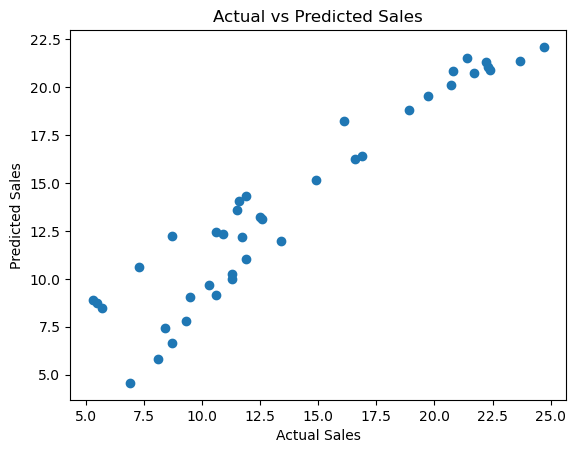

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

This will give you a solid baseline sales prediction model. Further refinements, like feature engineering or model selection, can improve prediction accuracy.

Here's how you can test the model on the test set, make predictions on new/unseen data, and save the trained model for future use.

### 1. **Test the Model on the Test Set**
   After training the model, evaluate it on the test set using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to understand its performance.


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

In [31]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

In [32]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1.4607567168117608
Mean Squared Error: 3.174097353976104
Root Mean Squared Error: 1.7815996615334502


The **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **Root Mean Squared Error (RMSE)** are commonly used metrics for evaluating the performance of a regression model, each providing different insights into the model’s accuracy.

1. **Mean Absolute Error (MAE)**: 1.4608
   - MAE measures the average absolute difference between the predicted and actual values. An MAE of 1.4608 indicates that, on average, the model’s predictions are 1.46 units away from the actual values. This metric provides a straightforward interpretation of error in the same units as the target variable. Lower MAE values indicate better accuracy.

2. **Mean Squared Error (MSE)**: 3.1741
   - MSE calculates the average of the squared differences between predicted and actual values. The squaring process penalizes larger errors more heavily, making MSE sensitive to outliers. Here, an MSE of 3.1741 suggests that there are some errors that contribute more significantly to the overall error. The units of MSE are squared units of the target variable, which can make it harder to interpret directly.

3. **Root Mean Squared Error (RMSE)**: 1.7816
   - RMSE is the square root of MSE, which brings the error back to the same units as the target variable, making it easier to interpret. An RMSE of 1.7816 means that, on average, the model’s predictions deviate from the actual values by about 1.78 units. RMSE is particularly useful when larger errors need to be penalized, as it emphasizes higher deviations.

**Summary**:
- All three metrics indicate that the model has a reasonably low error. 
- **MAE** provides a straightforward interpretation of error magnitude, **MSE** highlights any large errors more heavily, and **RMSE** gives an average error magnitude while penalizing larger deviations. 
- Together, these metrics suggest that the model’s predictions are fairly accurate, with deviations from actual values generally small and manageable.

These metrics provide insight into how well the model performs on the test data. Lower values generally indicate a better model fit.

### 2. **Make Predictions on New Data**
   To predict sales on new or unseen data, use the trained model. Create a sample input (or load new data) with columns `'TV'`, `'Radio'`, and `'Newspaper'`.

In [33]:
# Example of new/unseen data
new_data = pd.DataFrame({
    'TV': [230.1, 44.5, 17.2],
    'Radio': [37.8, 39.3, 45.9],
    'Newspaper': [69.2, 45.1, 69.3]
})

In [34]:
# Predict sales
new_predictions = model.predict(new_data)
print("Predicted Sales for new data:", new_predictions)

Predicted Sales for new data: [20.61397147 12.52942275 12.62381325]


   These predictions provide expected sales figures based on advertising budgets in `'TV'`, `'Radio'`, and `'Newspaper'`.

### 3. **Save the Trained Model**
   To use the model in production, save it using `joblib` or `pickle`, which allows you to reload it without retraining.

In [35]:
import joblib

In [36]:
# Save the model
joblib.dump(model, 'sales_prediction_model.joblib')

['sales_prediction_model.joblib']

In [37]:
# Load the model (if needed later)
loaded_model = joblib.load('sales_prediction_model.joblib')

In [38]:
# Test loading by predicting on new data
test_predictions = loaded_model.predict(new_data)
print("Predicted Sales with loaded model:", test_predictions)

Predicted Sales with loaded model: [20.61397147 12.52942275 12.62381325]


### Summary
1. You’ve evaluated the model on the test set.
2. You can predict sales on new data using the trained model.
3. The model is saved for easy reuse in future applications.

This approach prepares your model for deployment and allows you to quickly load it to make predictions on real-time data.